In [4]:
from arcgis import GIS
import arcgis
from arcgis.raster.functions import *

In [5]:
gis = GIS('https://arcgis.com', 'bhammersley_tech')

Enter password: ········


<h1> Introduction </h1>

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
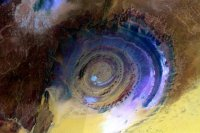

In [6]:
landsat_item=gis.content.search('landsat', outside_org=True)[0]
landsat_item

In [7]:
from IPython.display import HTML
HTML(landsat_item.description)

Band,Description,Wavelength (µm),Spatial Resolution (m)
1,Coastal aerosol,0.43 - 0.45,30
2,Blue,0.45 - 0.51,30
3,Green,0.53 - 0.59,30
4,Red,0.64 - 0.67,30
5,Near Infrared (NIR),0.85 - 0.88,30
6,SWIR 1,1.57 - 1.65,30
7,SWIR 2,2.11 - 2.29,30
8,Cirrus (in OLI this is band 9),1.36 - 1.38,30
9,QA Band (available with Collection 1)*,NA,30
Band,Description,Wavelength (µm),Spatial Resolution (m)


<h1> Analysis </h1>

In [8]:
m = gis.map()
m.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},'x': 1528532.679741411,'y': 6853346.179085481}
m.zoom = 13.0
m

MapView(layout=Layout(height='400px', width='100%'), zoom=13.0)

In [10]:
landsat = landsat_item.layers[0]
m.add_layer(landsat)

In [11]:
from arcgis.raster.functions import apply

ndvi_lyr = ndvi(landsat, '5 4')

In [12]:
enhanced_ndvi = colormap(remap(ndvi_lyr,
                              input_ranges=[0.5,1],
                              output_values = [1],
                              no_data_ranges=[-1,0.5]),
                         colormap=[[1,124,252,0]])

In [13]:
m.remove_layers()
m.add_layer(enhanced_ndvi)

<h1> Compare NDVI over time </h1>

In [14]:
from arcgis import geocode
area = geocode('Berlin', out_sr=landsat.properties.spatialReference)[0]

In [15]:
selected = landsat.filter_by(where="(CloudCover <=0.15) AND (WRS_Row = 24) AND (AcquisitionDate > '2018-01-01') AND (AcquisitionDate < '2019-01-01')", 
                   geometry=arcgis.geometry.filters.intersects(area['extent']))

In [16]:
fs = selected.query(out_fields="Category,AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")
df = fs.sdf
df

,AcquisitionDate,Best,Category,CloudCover,GroupName,Month,Name,OBJECTID,SHAPE,Shape_Area,Shape_Length,WRS_Row
0,2018-02-06 09:56:38,13808024,1,0.0573,LC81920242018037LGN00_MTL,2,LC81920242018037LGN00,2241202,"{""rings"": [[[1783797.7778999992, 6852221.972999997], [1696277.5709999986, 6557715.897], [1418736.556400001, 6634933.791699998], [1496191.4860999994, 6933619.758599997], [1783797.7778999992, 6852221.972999997]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.035213e+10,1.202786e+06,24
1,2018-02-13 10:02:46,13807024,1,0.0563,LC81930242018044LGN00_MTL,2,LC81930242018044LGN00,2243588,"{""rings"": [[[1611739.7701999992, 6852233.823899999], [1524096.8198000006, 6557867.269199997], [1246493.1416999996, 6634920.711099997], [1324010.5029000007, 6933503.608099997], [1611739.7701999992, 6852233.823899999]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.034064e+10,1.202703e+06,24
2,2018-02-22 09:56:32,10808024,1,0.0218,LC81920242018053LGN00_MTL,2,LC81920242018053LGN00,2251490,"{""rings"": [[[1747310.7727999985, 6732305.856600001], [1695343.6842, 6557716.466200002], [1417974.4373999983, 6634909.656199999], [1495400.691300001, 6933602.543899998], [1783024.9514000006, 6852229.955499999], [1747310.7727999985, 6732305.856600001]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.033293e+10,1.202677e+06,24
3,2018-03-01 10:02:39,10807024,1,0.0395,LC81930242018060LGN00_MTL,3,LC81930242018060LGN00,2248963,"{""rings"": [[[1611250.9118999988, 6852230.056699999], [1523627.3502000012, 6557667.301100001], [1246026.740600001, 6634703.007700004], [1323517.4034000002, 6933482.019900002], [1611250.9118999988, 6852230.056699999]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.039297e+10,1.203061e+06,24
4,2018-04-18 10:02:14,9807024,1,0.0003,LC81930242018108LGN00_MTL,4,LC81930242018108LGN00,2276368,"{""rings"": [[[1608603.3691999987, 6852409.950300001], [1521072.0782000013, 6557814.091799997], [1243638.2956000008, 6634771.6778], [1321039.3630999997, 6933574.377599999], [1608603.3691999987, 6852409.950300001]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.033708e+10,1.202698e+06,24
5,2018-05-13 09:55:49,6808024,1,0.0075,LC81920242018133LGN00_MTL,5,LC81920242018133LGN00,2286150,"{""rings"": [[[1778507.6887000017, 6852524.543899998], [1690945.2542000003, 6557922.2163999975], [1413403.3751999997, 6635019.372299999], [1457935.788899999, 6806840.768399999], [1490709.011599999, 6933595.763400003], [1778507.6887000017, 6852524.543899998]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.034944e+10,1.202812e+06,24
6,2018-05-20 10:01:54,7807024,1,0.0004,LC81930242018140LGN00_MTL,5,LC81930242018140LGN00,2295920,"{""rings"": [[[1606449.3134000003, 6852461.488899998], [1519038.7749000005, 6557866.7282000035], [1241339.2547000013, 6634868.152500004], [1318803.305300001, 6933677.238499999], [1606449.3134000003, 6852461.488899998]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.039105e+10,1.203045e+06,24
7,2018-05-29 09:55:36,8808024,1,0.0217,LC81920242018149LGN00_MTL,5,LC81920242018149LGN00,2295881,"{""rings"": [[[1778707.6838999987, 6852490.210600004], [1691178.3663999997, 6557730.953500003], [1413783.8506000005, 6634778.984300002], [1491241.422600001, 6933709.000299998], [1778707.6838999987, 6852490.210600004]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.036593e+10,1.202899e+06,24
8,2018-07-07 10:02:04,15807024,1,0.1401,LC81930242018188LGN00_MTL,7,LC81930242018188LGN00,2317538,"{""rings"": [[[1615059.3581999987, 6852015.692900002], [1527233.944600001, 6557733.655299999], [1249630.231899999, 6635125], [1327338.4243, 6933643.6701000035], [1615059.3581999987, 6852015.692900002]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.036197e+10,1.202841e+06,24
9,2018-07-16 09:55:57,14808024,1,0.1374,LC81920242018197LGN00_MTL,7,LC81920242018197LGN00,2323537,"{""rings"": [[[1786926.192

In [17]:
df = df.iloc[[0,3,4,5,9,11,13,14,15]]
df

,AcquisitionDate,Best,Category,CloudCover,GroupName,Month,Name,OBJECTID,SHAPE,Shape_Area,Shape_Length,WRS_Row
0,2018-02-06 09:56:38,13808024,1,0.0573,LC81920242018037LGN00_MTL,2,LC81920242018037LGN00,2241202,"{""rings"": [[[1783797.7778999992, 6852221.972999997], [1696277.5709999986, 6557715.897], [1418736.556400001, 6634933.791699998], [1496191.4860999994, 6933619.758599997], [1783797.7778999992, 6852221.972999997]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.035213e+10,1.202786e+06,24
3,2018-03-01 10:02:39,10807024,1,0.0395,LC81930242018060LGN00_MTL,3,LC81930242018060LGN00,2248963,"{""rings"": [[[1611250.9118999988, 6852230.056699999], [1523627.3502000012, 6557667.301100001], [1246026.740600001, 6634703.007700004], [1323517.4034000002, 6933482.019900002], [1611250.9118999988, 6852230.056699999]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.039297e+10,1.203061e+06,24
4,2018-04-18 10:02:14,9807024,1,0.0003,LC81930242018108LGN00_MTL,4,LC81930242018108LGN00,2276368,"{""rings"": [[[1608603.3691999987, 6852409.950300001], [1521072.0782000013, 6557814.091799997], [1243638.2956000008, 6634771.6778], [1321039.3630999997, 6933574.377599999], [1608603.3691999987, 6852409.950300001]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.033708e+10,1.202698e+06,24
5,2018-05-13 09:55:49,6808024,1,0.0075,LC81920242018133LGN00_MTL,5,LC81920242018133LGN00,2286150,"{""rings"": [[[1778507.6887000017, 6852524.543899998], [1690945.2542000003, 6557922.2163999975], [1413403.3751999997, 6635019.372299999], [1457935.788899999, 6806840.768399999], [1490709.011599999, 6933595.763400003], [1778507.6887000017, 6852524.543899998]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.034944e+10,1.202812e+06,24
9,2018-07-16 09:55:57,14808024,1,0.1374,LC81920242018197LGN00_MTL,7,LC81920242018197LGN00,2323537,"{""rings"": [[[1786926.1928000003, 6852138.747199997], [1699090.3035000004, 6557707.191600002], [1421690.7514000013, 6635064.763800003], [1499470.1136999987, 6933885.604199998], [1786926.1928000003, 6852138.747199997]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.036302e+10,1.202869e+06,24
11,2018-08-01 09:56:04,9808024,1,0.0452,LC81920242018213LGN00_MTL,8,LC81920242018213LGN00,2330109,"{""rings"": [[[1787319.9098000005, 6852368.413099997], [1699304.3830000013, 6557893.880800001], [1421780.876699999, 6635217.486100003], [1499546.3220000006, 6933891.802900001], [1787319.9098000005, 6852368.413099997]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.040978e+10,1.203171e+06,24
13,2018-09-18 09:56:24,5808024,1,0.0289,LC81920242018261LGN00_MTL,9,LC81920242018261LGN00,2352371,"{""rings"": [[[1747466.8181999996, 6719814.956299998], [1699007.0749999993, 6557701.807800002], [1421602.3900000006, 6634872.945500001], [1499376.8291000016, 6933688.1504999995], [1787033.4331, 6852131.325400002], [1747466.8181999996, 6719814.956299998]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.038309e+10,1.203011e+06,24
14,2018-10-11 10:02:46,5807024,1,0.0008,LC81930242018284LGN00_MTL,10,LC81930242018284LGN00,2368509,"{""rings"": [[[1612610.829, 6852197.376699999], [1524872.6790999994, 6557693.3517], [1247441.499400001, 6635012.259400003], [1324863.6479000002, 6933737.260200001], [1612610.829, 6852197.376699999]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.037934e+10,1.202972e+06,24
15,2018-11-28 10:02:53,6807024,1,0.0605,LC81930242018332LGN00_MTL,11,LC81930242018332LGN00,2390714,"{""rings"": [[[1611830.4155000001, 6852192.542199999], [1524119.8236999996, 6557680.053499997], [1246685.3013999984, 6634972.395499997], [1324273.8724000007, 6933711.736699998], [1611830.4155000001, 6852192.542199999]]], ""spatialReference"": {""wkid"": 102100, ""latestWkid"": 3857}}",9.035835e+10,1.202835e+06,24


In [19]:
for i,x in df.iterrows():
    l8_layer = landsat.filter_by('OBJECTID='+str(x['OBJECTID']))
    ndvi_lyr = ndvi(l8_layer, '5 4')
    enhanced_ndvi = colormap(remap(ndvi_lyr,
                                   input_ranges=[0.5,1],
                                   output_values = [1],
                                   no_data_ranges=[-1,0.3]),
                             colormap=[[1,124,252,0]])

    m2.remove_layers()
    m2.add_layer(enhanced_ndvi)
    print(x['AcquisitionDate'])

2018-02-06 09:56:38
2018-03-01 10:02:39
2018-04-18 10:02:14
2018-05-13 09:55:49
2018-07-16 09:55:57
2018-08-01 09:56:04
2018-09-18 09:56:24
2018-10-11 10:02:46
2018-11-28 10:02:53


In [18]:
m2 = gis.map()
m2.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},'x': 1537577.7288660354,'y': 6853855.758496488}
m2.zoom = 12.0
m2

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)